# Lab 1 — Your First Computer Vision Program

**Learning goals**

---

By the end of this lab, you will be able to:

* Load an image from disk/webcam and inspect its properties (size, channels, dtype).

* Display images correctly.

* Convert between color spaces (BGR↔RGB, BGR→GRAY, BGR→HSV).

* Apply point operations (brightness/contrast).

* Save images to disk.

* Do simple manipulations: crop a region and draw shapes.

\
**Prerequisites**

---

These are the requirements if you are running in a local machine or remote server.

[VSCode](https://code.visualstudio.com/download)

* uv (virtual environment)
* Python 3.9+ (3.12 preferred)
* Packages: ```opencv-python```, ```matplotlib```, ```numpy```


```
pip install opencv-python matplotlib numpy
```

> Sample image: use any ```.jpg/.png``` (e.g., ```assets/photo.jpg```). Create a ```assets/``` folder next to your notebook.



# Project scaffold

> Create a file ```lab1_cv_basics.ipynb``` (Jupyter). Put your image at ```assets/photo.jpg.```



[You can download the image here](https://drive.google.com/drive/folders/19GLuu95nMViM9da6gnbpJA63_oEHbWOU?usp=sharing)

In [31]:
# Import necessary library:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import datetime

# 1. Read Image

## 1.1 Read Image from File

### In Google Colab

In [ ]:
# For users in google colab!!
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check your current location
# import os
!pwd

/content


In [ ]:
# Figuring out where my files are probably located!
!ls drive/MyDrive/Colab\ Notebooks/CV_2025/LAB01/assets/

gray.png  photo.png  redball.jpg  with_rectangle.jpg


In [ ]:
# Saving my image path to an variable
img_path = '/content/drive/MyDrive/Colab Notebooks/CV_2025/LAB01/assets/photo.png'

img_bgr_collab = cv2.imread(img_path)

assert img_bgr_collab is not None, "Image not found. Check the path."
# assert <condition>, "debug if condition not satisfied"
# It makes sure that condition is met and throws the error if condition is not matched!!

### Local PC

In [32]:
#If you are using the local machine
img_path_local = 'assets/photo.png'

In [33]:
img_bgr = cv2.imread(img_path_local)         # returns BGR or None if not found -- opencv always loads image in BGR
                                       # change it to img_path_local if you are using local machine

assert img_bgr is not None, "Image not found. Check the path."
# assert <condition>, "debug if condition not satisfied"
# It makes sure that condition is met and throws the error if condition is not matched!!

## 1.2 Inspect properties of loaded image

In [34]:
print("shape (H, W, C):", img_bgr.shape)
print("dtype:", img_bgr.dtype)                  # typically uint8 - 0-255
h, w, c = img_bgr.shape

shape (H, W, C): (1024, 1024, 3)
dtype: uint8




> Notes
* shape is (rows, cols, channels) → (height, width, channels).
* dtype uint8 means values in [0, 255].



In [5]:
# Using f-string to print

print(f"shape (H, W, C): {img_bgr.shape}")
print(f"dtype:, {img_bgr.dtype}")

shape (H, W, C): (1024, 1024, 3)
dtype:, uint8


## 1.3 Read images from the webcam

[Reference](https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html)

In [35]:
# Access the webcam and display the video feed
# Reference: https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display

cap = cv2.VideoCapture(0)                           # 0 is the default camera index
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()                         # ret is a boolean indicating if the frame was captured correctly

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    # Display the original BGR frame
    cv2.imshow('BGR Frame', frame)

    # Get key press
    if  cv2.waitKey(1) & 0xFF== ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# 2. Display the Image

### Google colab

In [ ]:
# For displaying the image in google colab
from google.colab.patches import cv2_imshow
cv2_imshow(img_bgr)

### Local machine

In [36]:
# Show image in a window
cv2.imshow('BGR Image', img_bgr)
cv2.waitKey(0)  # Wait until a key is pressed
cv2.destroyAllWindows()

## 2.1 Display image of each color channel, ie, Red, green and blue

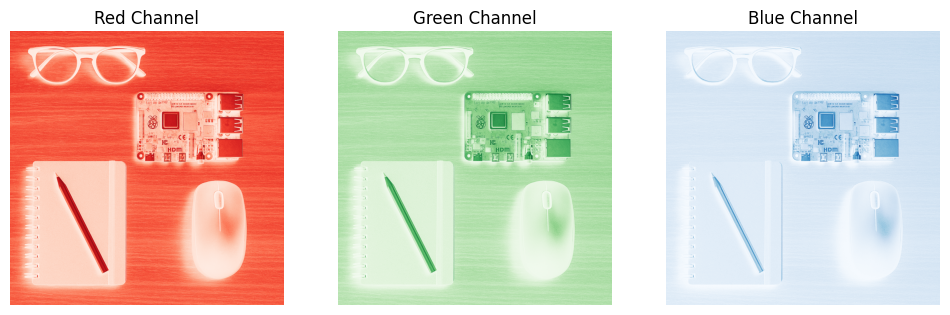

In [37]:
# Split into R, G, B channels
B, G, R = cv2.split(img_bgr)

# Display each channel
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

# 3. Convert to other color spaces

## WHY is the conversion Necessary?

### For correct colors in display

* OpenCV loads images as BGR (Blue–Green–Red).
* Many other libraries (like matplotlib) expect RGB (Red–Green–Blue).
* If you display a BGR image directly with matplotlib, the colors will look weird — reds will appear blue, blues will appear red.

### Some algorithms only need luminance (brightness) instead of full color:

* Face detection
* Edge detection (Canny, Sobel, etc.)
* Thresholding

> These work better and faster on grayscale images.

### For special color-based segmentation
You might want to work in a color space where certain objects are easier to separate:

* HSV (Hue–Saturation–Value) — better for detecting colors regardless of lighting.

* LAB — better for brightness vs. color separation.

* YCrCb — used in some skin tone detection algorithms.

### For machine learning / deep learning preprocessing

* Neural networks often require input in normalized RGB or other formats.
* Converting from BGR ensures the model gets the data in the format it was trained on.

### In short

* BGR → RGB → For correct color display and input to the model.

* BGR → GRAY → For single-channel processing & faster algorithms.

* BGR → HSV/LAB/YCrCb → For robust color segmentation or lighting-invariant detection.



In [10]:
# Convert an image from BGR to RGB

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [11]:
print(f"shape (H, W, C): {img_rgb.shape}")
print(f"dtype:, {img_bgr.dtype}")

shape (H, W, C): (1024, 1024, 3)
dtype:, uint8


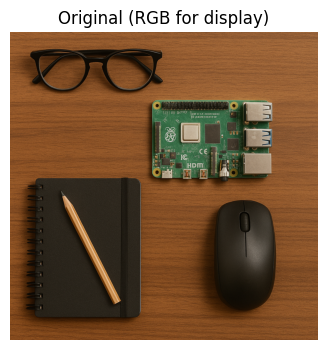

In [38]:
plt.figure(figsize=(5,4))
plt.imshow(img_rgb)
plt.title("Original (RGB for display)")
plt.axis("off")
plt.show()

> Lets plot images side by side (BGR-RGB)

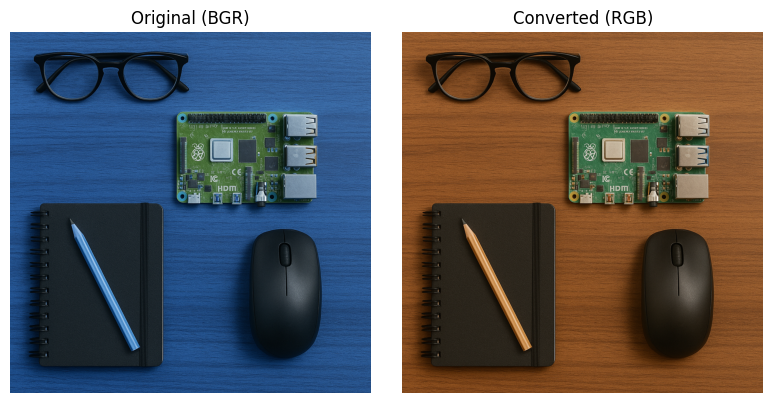

In [39]:
# Display side by side
plt.figure(figsize=(8, 4))                       # (width, height)

# BGR image (converted for proper display)
plt.subplot(1, 2, 1)                             # (num_rows, num_columns, index of current subplot)
plt.imshow(img_bgr)
plt.title("Original (BGR)")
plt.axis("off")

# RGB image
plt.subplot(1, 2, 2)                             # (num_rows, num_columns, index of current subplot)
plt.imshow(img_rgb)
plt.title("Converted (RGB)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Task : Plot the figures rowwise

In [ ]:
# Display side by side
plt.figure(figsize=( , ))

# BGR image (converted for proper display)
plt.subplot()                             # (num_rows, num_columns, index of current subplot)
plt.imshow(img_bgr)
plt.title("Original (BGR)")
plt.axis("off")

# RGB image
plt.subplot()                           # (num_rows, num_columns, index of current subplot)
plt.imshow(img_rgb)
plt.title("Converted (RGB)")
plt.axis("off")

plt.tight_layout()
plt.show()

In [40]:
# Lets build a helper function for displaying the image using Matplotlib

# The function takes title, image and colour_map as the arguments:
# The figure size are hardcoded

def show(title, im, cmap=None):
    plt.figure(figsize=(6,4))
    if cmap: plt.imshow(im, cmap=cmap)
    else:    plt.imshow(im)
    plt.title(title); plt.axis("on"); plt.show()

In [41]:
# Convert to gray scale - 1 channel

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

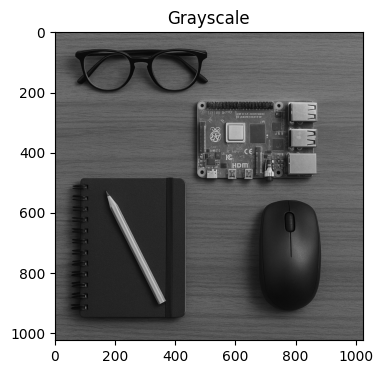

In [42]:
show("Grayscale", img_gray, cmap="gray")

In [19]:
print(f"shape (H, W, C): {img_gray.shape}")
print(f"dtype:, {img_gray.dtype}")

shape (H, W, C): (1024, 1024)
dtype:, uint8


## Access the webcam to take the stream and show the grey scale output

In [43]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('Grayscale Frame', gray)

    # Get key press
    if  cv2.waitKey(1) & 0xFF== ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Why Convert to HSV?
RGB/BGR mixes color + brightness, making color processing harder.

HSV separates them:

* H (Hue) → color type (red, blue, green…)

* S (Saturation) → color intensity

* V (Value) → brightness

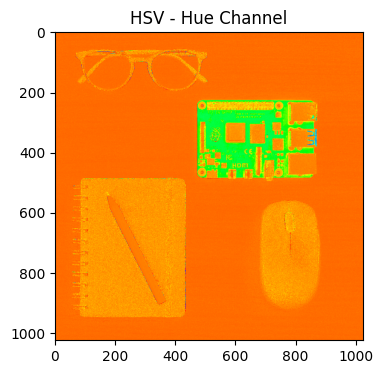

In [45]:
img_hsv  = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

show("HSV - Hue Channel", img_hsv[...,0], cmap='hsv')



```img_hsv[...,0]``` - This is the numpy slicing with an ellipsis (...)


*   ```...``` means "*keep all dimensions except the one I'm specifying*"
*   img_hsv is usually a 3D array (Height × Width × Channels).
*   Channel 0 → Hue (color tone, from 0 to 179 in OpenCV’s 8-bit representation)
*   Channel 1 → Saturation
*   Channel 2 → Value (brightness)





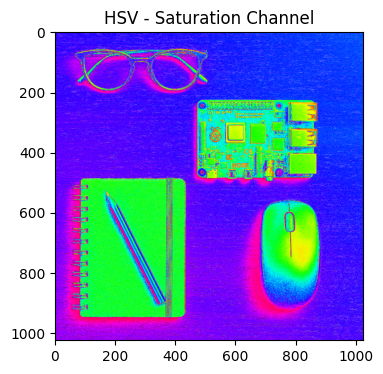

In [50]:
show("HSV - Saturation Channel", img_hsv[...,1], cmap='hsv')

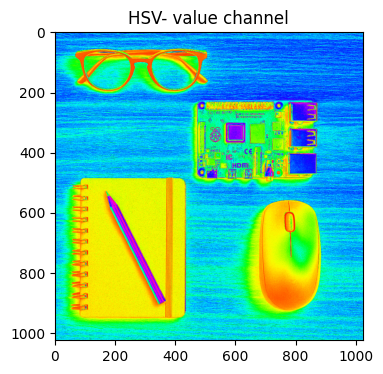

In [51]:
show("HSV- value channel", img_hsv[...,2], cmap='hsv')

Practical Uses
1. Color detection

    * Simple range checks in Hue channel (e.g., detect a red ball).

2. Robust segmentation

    * Ignore brightness (V) to handle varying lighting.

3. Skin detection / human tracking

    * Narrow hue + saturation ranges capture most skin tones.

4. Image enhancement

    * Adjust Saturation for vividness, Value for brightness.

5. Feature extraction

    * Use only Hue for color-based tasks, or only V for texture/brightness.

6. Color-based tracking

    * CAMShift/MeanShift tracking works well with hue masks.


[Read this article to learn more about HSV color space](https://medium.com/@dijdomv01/a-beginners-guide-to-understand-the-color-models-rgb-and-hsv-244226e4b3e3)

[Short Video](https://www.youtube.com/shorts/LWQv26uMAhY?feature=share)

### Hue in OpenCV wraps around
0 (red) → 60 (green) → 120 (blue) → 179 (red again)

### RED (two ranges because hue wraps around)
* lower_red1 = np.array([0, 50, 50])
*upper_red1 = np.array([10, 255, 255])

* lower_red2 = np.array([170, 50, 50])
* upper_red2 = np.array([180, 255, 255])

### GREEN
* lower_green = np.array([35, 50, 50])
* upper_green = np.array([85, 255, 255])

### BLUE
* lower_blue = np.array([100, 50, 50])
* upper_blue = np.array([130, 255, 255])

### YELLOW
* lower_yellow = np.array([20, 50, 50])
* upper_yellow = np.array([30, 255, 255])

### CYAN (light blue / aqua)
* lower_cyan = np.array([85, 50, 50])
* upper_cyan = np.array([100, 255, 255])

### MAGENTA / PINK
* lower_magenta = np.array([140, 50, 50])
* upper_magenta = np.array([170, 255, 255])


Saturation and Value lower bounds (50 here) prevent detecting very dark or very faded colors.

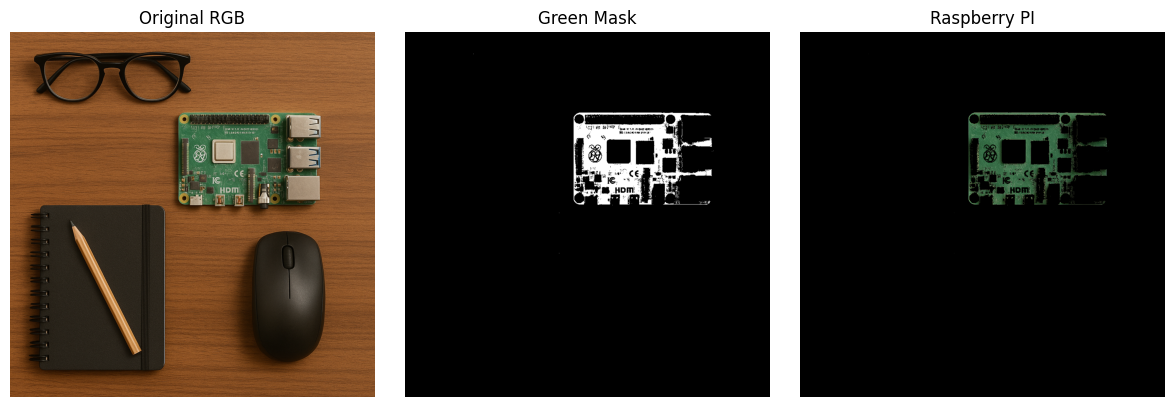

In [24]:
# Let find the raspberry Pi in the above image (has green area)

# Define green range in HSV
# Hue for green is ~35–85 in OpenCV scale (0–179)
# Saturation: 50 → 255
# Value: 50 → 255

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Create mask
mask = cv2.inRange(img_hsv, lower_green, upper_green)  # cv2.inRange keeps only the pixels in that range.

# Apply mask to original RGB image
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)  # cv2.bitwise_and filters out everything else.

# Show results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Green Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(result)
plt.title("Raspberry PI")
plt.axis("off")

plt.tight_layout()
plt.show()

# TASK:

1. Use the image redball.jpg
2. Load the image using opencv
3. Show the image using matplotlib
4. Show ONLY the red cricket ball in the image using the image.

### BONUS: Lighting conditions may require tuning: you can use track bars in OpenCV to find the perfect ranges interactively.

# 4. Brightness & contrast (point operation)

Two common methods:

*  Using OpenCV’s built-in alpha/beta
*  Manual with NumPy

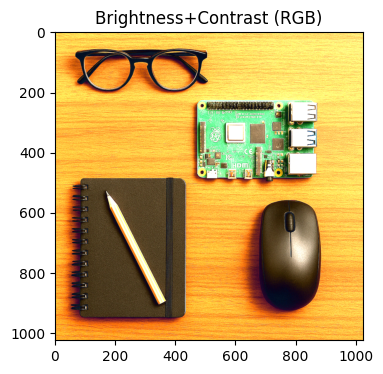

In [56]:
alpha = 3   # increase contrast
beta  = -50    # increase brightness
bright_contrast = cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=beta)
show("Brightness+Contrast (RGB)", cv2.cvtColor(bright_contrast, cv2.COLOR_BGR2RGB))

What's Happening??

alpha → contrast factor.

* \> 1 → increases contrast (makes darks darker, lights lighter).

* < 1 → decreases contrast (makes tones more similar).

beta → brightness offset.

* Positive → brightens the image.

* Negative → darkens it.

cv2.convertScaleAbs(src, alpha, beta) internally does:

```new_img = saturate(| alpha * src + beta |)```

and clips the result to [0,255] automatically, converting to uint8.

Then you convert from BGR to RGB for Matplotlib display.

In [ ]:
# Lets do the same manually!

alpha = 0.8
beta  = -30

# Convert the img_bgr to float32 type - use .astype() function
float_img_bgr =

# multiply by alpha
float_img_bgr = float_img_bgr * alpha

# add beta
float_img_bgr = float_img_bgr + beta

# Clip the results to [0,255] - use np.clip()
result =

# Convert the result back to uint8 type - use .astype() function again
converted_img =

# Convert to RGB and show!
show("Manual point op (RGB)", cv2.cvtColor(converted_img, ))

# 5. Save images to disk

In [26]:
ok = cv2.imwrite("assets/gray.png", img_gray)      # ensure 'out/' exists
print("Saved?", ok)

Saved? True


> If ```False```, make sure the folder exists:

```import os; os.makedirs("folder_name", exist_ok=True)```

In [ ]:
import os

def safe_imwrite(path, img, color_space="BGR"):
    """
    Save an image with automatic color space handling.

    Args:
        path (str): File path to save the image.
        img (np.ndarray): Image array.
        color_space (str): "BGR", "RGB", "HSV", or "GRAY".
    """
    # Ensure output folder exists
    os.makedirs(os.path.dirname(path), exist_ok=True)

    # Convert to BGR if needed
    if color_space.upper() == "RGB":
        img_to_save = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    elif color_space.upper() == "HSV":
        img_to_save = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
    elif color_space.upper() == "GRAY":
        img_to_save = img  # Already okay
    else:  # Default BGR
        img_to_save = img

    ok = cv2.imwrite(path, img_to_save)
    print(f"Saved? {ok} → {path}")

## Save your RGB and HSV images using the function above!

In [ ]:
# your code goes here!

### Access the webcam and capture video with options to save snapshots and record video

In [57]:

# Reference: https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display

cap = cv2.VideoCapture(0)                           # 0 is the default camera index
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Variables for video recording
recording = False
out = None

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    cv2.imshow('BGR Frame', frame)

    # Get key press
    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):
        break

    elif key == ord('s'):
        # Create filename with timestamp
        filename = f"snapshot_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.jpg"
        cv2.imwrite(filename, frame)
        print(f"Snapshot saved as {filename}")

    elif key == ord('c'):
        # Toggle recording on/off
        if not recording:
            # Start recording
            fourcc = cv2.VideoWriter_fourcc(*'XVID')  # AVI format
            video_filename = f"video_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.avi"
            out = cv2.VideoWriter(video_filename, fourcc, 20.0, (frame.shape[1], frame.shape[0]))
            recording = True
            print(f"Started recording: {video_filename}")
        else:
            # Stop recording
            recording = False
            out.release()
            print("Stopped recording")

    # Write to file if recording
    if recording and out is not None:
        out.write(frame)

# Cleanup
if out is not None:
    out.release()

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Snapshot saved as snapshot_20250819_123043.jpg
Started recording: video_20250819_123104.avi


# 6. Image Manipulations: Crop & Draw



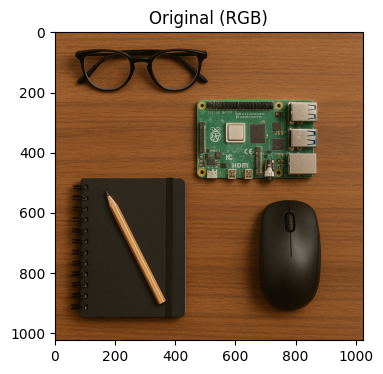

In [27]:
show("Original (RGB)", img_rgb)

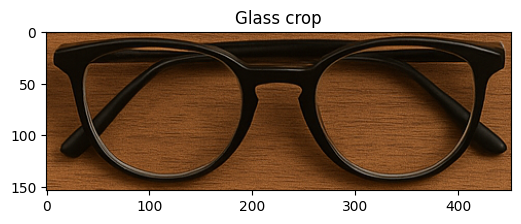

In [28]:
# Cropping (ROI: y1:y2, x1:x2)

y1, y2 = 50, h//5
x1, x2 = 60, w//2
crop = img_rgb[y1:y2, x1:x2]      # Glass crop - clipping
show("Glass crop", crop)

## Crop the mouse area!

In [ ]:
y1, y2 =
x1, x2 =

crop_mouse = img_rgb[y1:y2, x1:x2]
show("Mouse crop", crop_mouse)

## Draw a Rectangle on a copy and save

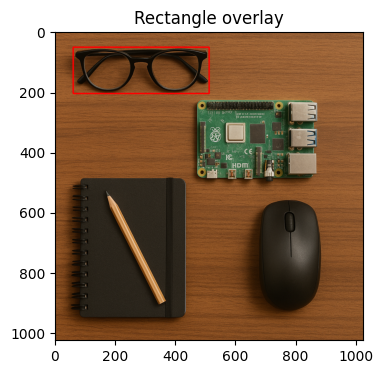

True

In [29]:
canvas = img_bgr.copy()
pt1, pt2 = (x1, y1), (x2, y2)
color_bgr = (0, 0, 255)   # Red in BGR
thickness = 3
cv2.rectangle(canvas, pt1, pt2, color_bgr, thickness)   # requires diagnols
show("Rectangle overlay", cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

cv2.imwrite("assets/with_rectangle.jpg", canvas)

## Brainstorm:

1. What happens to shape when converting to grayscale? Why?

2. Brightness/contrast: Pick values of alpha and beta that make your image look washed out vs. too dark. Record the pair you prefer.

3. HSV manipulation: Zero out the Saturation channel and display the result, how does it differ from grayscale?